In [1]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package


# Gnostic Local Clustering (Density-Based)

### **Overview**
The **Machine Gnostics GnosticLocalClustering** provides a density-based clustering approach using **Estimating Local Distribution Functions (ELDF)**. Unlike K-means which partitions space based on distance to centroids, this model identifies clusters by finding the **peaks (modes)** and **valleys (boundaries)** in the underlying probability density function of the data.

Key advantages:
- **Automatic Cluster Detection:** No need to specify the number of clusters in advance (if `S='auto'`).
- **Non-Parametric Density Estimation:** Accurately models complex, multi-modal distributions.
- **Topological Clustering:** Clusters are defined naturally by the "hills" and "valleys" of the data's density.
- **Robustness:** Inherits the robust properties of Gnostic Distribution Functions.
- **Grid Search Capability:** Can perform a grid search over the scale parameter $S$ to find the optimal trade-off between detail and generalization.

---

### **Theoretical Background**

The model works in three main steps:
1.  **ELDF Estimation**: It fits an Estimating Local Distribution Function to the data, which provides a smooth, continuous estimate of the probability density function (PDF).
2.  **Peak Finding**: It identifies local maxima (peaks) in the PDF. Each peak corresponds to the mode of a cluster.
3.  **Valley Finding**: It identifies local minima (valleys) between peaks. These valleys define the natural boundaries between clusters.

The scale parameter $S$ controls the "resolution" of the density estimate. A smaller $S$ reveals more local details (more clusters), while a larger $S$ smooths the distribution (fewer clusters). The model can automatically find an optimal $S$ by minimizing **Residual Entropy**.

***

## Example 1: Basic Density-Based Clustering

In this example, we generate data from a mixture of 3 Gaussian distributions to simulate a multi-modal dataset. We then use `GnosticLocalClustering` to automatically detect these modes.

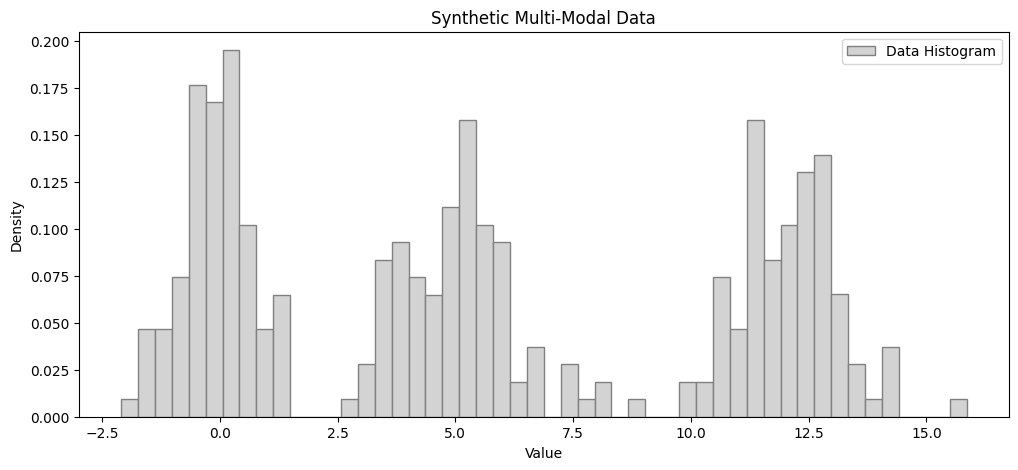

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models import GnosticLocalClustering

# Set random seed for reproducibility
np.random.seed(42)

def generate_multimodal_data(n_samples=300):
    """Generate 1D data from a mixture of 3 Gaussians."""
    # Cluster 1: Mean=0, Std=1
    c1 = np.random.normal(0, 0.8, n_samples // 3)
    # Cluster 2: Mean=5, Std=1.5
    c2 = np.random.normal(5, 1.2, n_samples // 3)
    # Cluster 3: Mean=12, Std=1.0
    c3 = np.random.normal(12, 1.0, n_samples // 3)
    
    data = np.concatenate([c1, c2, c3])
    np.random.shuffle(data)
    return data

# Generate data
data = generate_multimodal_data()

# Plot histogram of raw data
plt.figure(figsize=(12, 5))
plt.hist(data, bins=50, color='lightgray', edgecolor='gray', density=True, label='Data Histogram')
plt.title("Synthetic Multi-Modal Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [3]:
# Initialize and Fit using Auto-Optimization
# auto_S=True allows the model to find the best scale parameter automatically
model = GnosticLocalClustering(
    auto_S=True,
    verbose=True,
    history=True,
    varS=True
)

print("Fitting model...")
model.fit(data)

print(f"\nOptimization Complete:")
print(f"Optimal Scale Parameter (S): {model.optimal_S}")
print(f"Number of Clusters Detected: {model.n_clusters}")
print(f"Cluster Centroids (Peaks): {model.centroids.flatten()}")
print(f"Cluster Boundaries (Valleys): {model.cluster_boundaries}")

2026-01-31 21:36:34,822 | GnosticLocalClustering | INFO | GnosticLocalClustering initialized.
2026-01-31 21:36:34,822 | GnosticLocalClustering | INFO | GnosticLocalClustering initialized:
2026-01-31 21:36:34,822 | GnosticLocalClustering | INFO | GnosticLocalClustering initialized:
2026-01-31 21:36:34,823 | GnosticLocalClustering | INFO | GnosticLocalClustering initialized:
2026-01-31 21:36:34,823 | GnosticLocalClustering | INFO | HistoryClusteringBase initialized.
2026-01-31 21:36:34,823 | GnosticLocalClustering | INFO | GnosticLocalClustering initialized.
2026-01-31 21:36:34,823 | GnosticLocalClustering | INFO | Starting fit process for GnosticLocalClustering.
2026-01-31 21:36:34,824 | GnosticLocalClustering | INFO | Starting fit input/output processing for clustering.
2026-01-31 21:36:34,824 | GnosticLocalClustering | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-01-31 21:36:34,825 | GnosticLocalClustering | INFO | Identifying and converting data of type: <class 'nump

Fitting model...


2026-01-31 21:36:36,336 | GnosticLocalClustering | INFO | Making predictions with GnosticLocalClustering.
2026-01-31 21:36:36,337 | GnosticLocalClustering | INFO | Starting predict input/output processing for clustering.
2026-01-31 21:36:36,337 | GnosticLocalClustering | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2026-01-31 21:36:36,337 | GnosticLocalClustering | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-01-31 21:36:36,337 | GnosticLocalClustering | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-01-31 21:36:36,338 | GnosticLocalClustering | INFO | Fit complete. Optimal S: auto, Clusters: 5



Optimization Complete:
Optimal Scale Parameter (S): auto
Number of Clusters Detected: 5
Cluster Centroids (Peaks): [-0.08556099  4.0784974   5.28104875 12.44251125 15.83478296]
Cluster Boundaries (Valleys): [ 2.21185053  4.25798268  9.10408512 15.33222419]


### Visualization: PDF, Peaks, and Valleys

The `plot()` method visualizes the "landscape" of the data density.
- **Black Curve**: Estimated PDF (Probability Density Function).
- **Red Dots**: Peaks (Cluster Modes).
- **Blue Crosses**: Valleys (Cluster Boundaries).

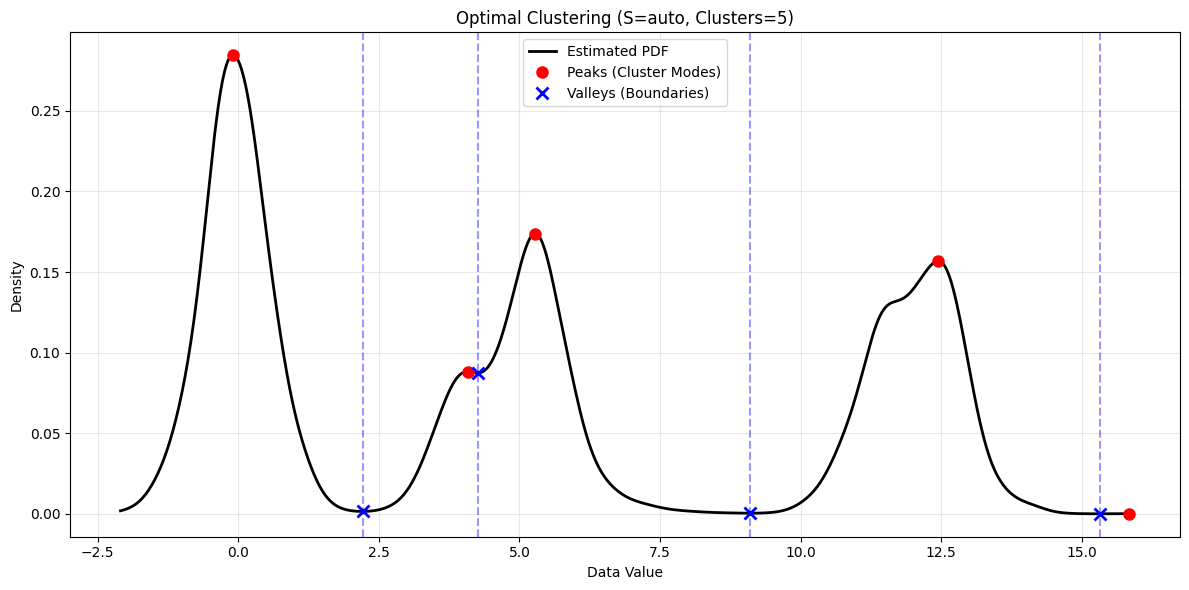

In [4]:
model.plot()

## Example 2: Analyzing Scale Sensitivity (Grid Search)

Sometimes you might want to explore how the clustering changes with different scale parameters $S$. A grid search can show you how the data structure interpretation varies from fine-grained (low S) to coarse-grained (high S).

We will scan $S$ from 0.1 to 2.0.

In [5]:
# stack loss data
data = np.array([42, 37, 37, 28, 18, 18, 19, 20, 15, 14, 14, 13, 11, 12,  8,  7,  8, 8,  9, 15, 15])

In [6]:
# Run with explicit Grid Search (auto_S=False)
model_grid = GnosticLocalClustering(
    start_S=0.1,
    end_S=2.0,
    step_S=0.1,
    auto_S=False,  # <--- Disable auto-optimization to force grid search
    verbose=False,
)

print("Running Grid Search...")
model_grid.fit(data)

# Show the results table (History)
# Lower residual_entropy generally indicates a better fit
print("\nFirst 5 rows of search history:")
print(model_grid.results[['S', 'n_clusters', 'residual_entropy']].head())

Running Grid Search...

First 5 rows of search history:
     S  n_clusters  residual_entropy
0  0.1          11          2.453815
1  0.2           8          2.429002
2  0.3           7          2.408618
3  0.4           5          2.404572
4  0.5           5          2.408618


### Elbow Curve: Choosing the Right Scale

The `plot()` method now shows a second panel (Grid Search Profile).
- **Green Line (Residual Entropy)**: Often has a minimum or an "elbow" at the optimal scale.
- **Magenta Line (Cluster Count)**: Shows how many clusters are detected at each scale.

This helps you understand the stability of your clusters. A stable region where the cluster count doesn't change much despite changing $S$ suggests a robust clustering.

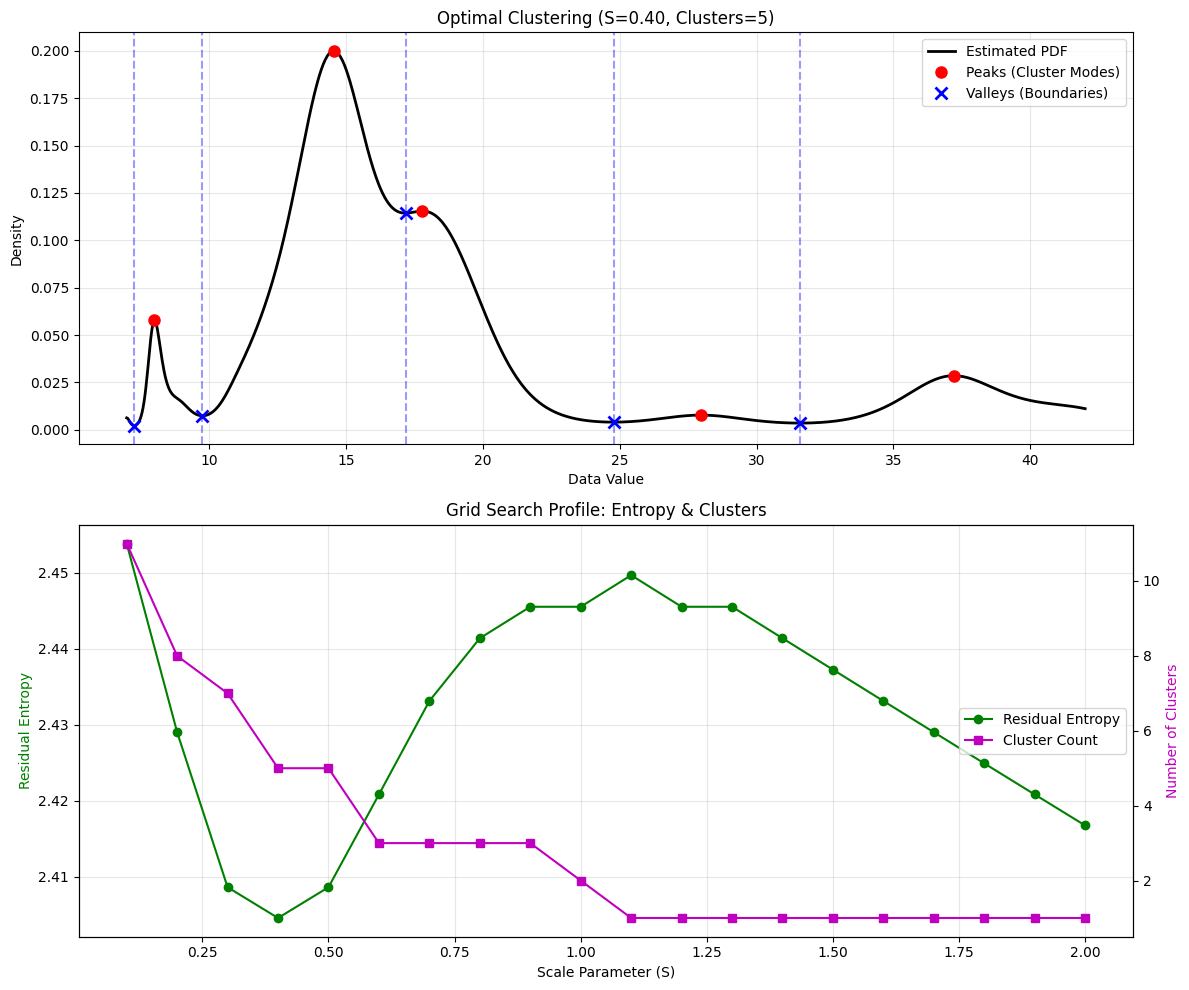

In [7]:
model_grid.plot()